# ECE 420 Prelab 4 - Autocorrelation & Voiced/Unvoiced

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read

FRAME_SIZE = 2048

## Part 1 - Voiced/Unvoiced Detection  
Q: How do we decide if a frame is voiced?  
A: Check energy > threshold → voiced (1), else unvoiced (0).

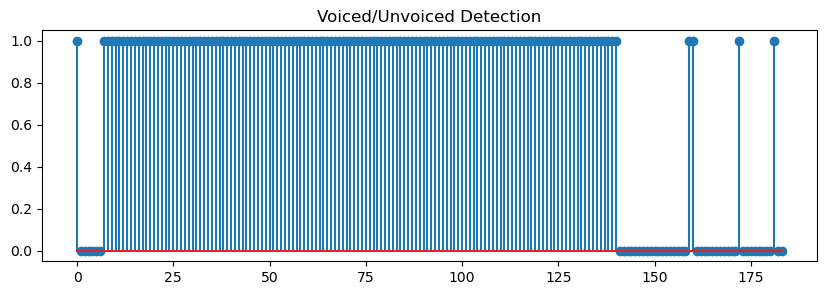

In [4]:
def ece420ProcessFrame(frame, threshold):
    energy = np.sum(frame**2)
    return 1 if energy > threshold else 0

Fs, data = read('test_vector.wav')
numFrames = len(data) // FRAME_SIZE
threshold = 1e7

framesVoiced = np.zeros(numFrames)
for i in range(numFrames):
    frame = data[i*FRAME_SIZE:(i+1)*FRAME_SIZE].astype(float)
    framesVoiced[i] = ece420ProcessFrame(frame, threshold)

plt.figure(figsize=(10,3))
plt.stem(framesVoiced)
plt.title("Voiced/Unvoiced Detection")
plt.show()

## Part 2 - Autocorrelation  
Q: Why is autocorrelation useful?  
A: It finds the pitch period (lag of max similarity).

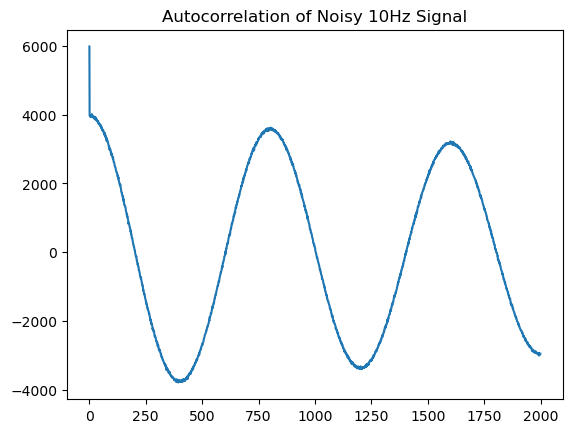

Lag at max Rxx: 11
Estimated Frequency: 727.2727272727273 Hz


In [5]:
fs = 8000
duration = 1
t = np.linspace(0, duration, duration*fs, endpoint=False)
freq = 10
tune = np.sin(2*np.pi*freq*t)
tune += np.random.normal(0, 0.5, duration*fs)

def autocorr(x):
    N = len(x)
    R = np.zeros(N)
    for lag in range(N):
        for n in range(N-lag):
            R[lag] += x[n] * x[n+lag]
    return R

Rxx = autocorr(tune)

plt.figure()
plt.plot(Rxx[:2000])
plt.title("Autocorrelation of Noisy 10Hz Signal")
plt.show()

lag_max = np.argmax(Rxx[1:]) + 1
estimated_freq = fs / lag_max
print("Lag at max Rxx:", lag_max)
print("Estimated Frequency:", estimated_freq, "Hz")